In [1]:
!pip install "pydantic>=1.10.0,<2.0.0" "strictyaml>=1.7.0,<2.0.0"


In [2]:
from typing import List
from pydantic import BaseModel

class AppConfig(BaseModel):
    package_name: str
    data_train_test: str
    test_data_file: str
    data_tablero: str
    pipeline_save_file: str

class ModelConfig(BaseModel):
    test_size: float
    random_state: int
    n_estimators: int
    max_features: int
    target: str
    features: str

class Config(BaseModel):
    app_config: AppConfig
    model_config: ModelConfig
    
class CombinedConfig(BaseModel):
    app_config: AppConfig
    model_config: ModelConfig

model_config_instance = ModelConfig(
    test_size=0.2,
    random_state=42,
    n_estimators=150,
    max_features=10,
    target='hdsufhsd',
    features='hdsufhsd2'
)
model_appinstance = AppConfig(
    package_name= 'hola',
    data_train_test= 'hoass',
    test_data_file= 'fdsdfs',
    data_tablero= 'str',
    pipeline_save_file= 'fdsfds'
)

_config = Config(
    app_config=model_appinstance,
    model_config=model_config_instance
)

# Imprimir la instancia de ModelConfig
(model_appinstance,model_config_instance)

(AppConfig(package_name='hola', data_train_test='hoass', test_data_file='fdsdfs', data_tablero='str', pipeline_save_file='fdsfds'),
 ModelConfig(test_size=0.2, random_state=42, n_estimators=150, max_features=10, target='hdsufhsd', features='hdsufhsd2'))

Importe de librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore", category=FutureWarning)
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import dash
import plotly

Carga de datos

In [4]:
Clasificacion = pd.read_excel('Data.xlsx',sheet_name='Datos')
Ventas_cerrado = pd.read_excel('Data.xlsx',sheet_name='Datos mes cerrados')
Ventas_semanales = pd.read_excel('Data.xlsx',sheet_name='Datos_mes_dia')

In [5]:
Ventas_cerrado

,FECHA ASIGNADO,CODIGO,CONTRIBUCION-2,ORDENES DE PEDIDO-2,UNIDADES VENDIDAS-2,CONTRIBUCION-3,ORDENES DE PEDIDO-3,UNIDADES VENDIDAS-3
0,2023-11,X548,1.000000,1.000000,1.000000,0.709625,0.780037,0.573626
1,2023-11,X160,0.402240,0.330869,0.314286,0.316937,0.297597,0.217582
2,2023-11,X848,0.308432,0.402957,0.309890,0.178797,0.134935,0.114286
3,2023-11,X231,0.199239,0.319778,0.237363,0.200751,0.218115,0.184615
4,2023-11,X429,0.343280,0.253235,0.169231,0.275769,0.133087,0.118681
...,...,...,...,...,...,...,...,...
4160,2023-07,X9,0.103511,0.000000,0.004396,0.103511,0.000000,0.004396
4161,2023-07,X8,0.103511,0.000000,0.004396,0.103511,0.000000,0.004396
4162,2023-07,X6,0.103384,0.000000,0.004396,0.103511,0.000000,0.004396
4163,2023-07,X4,0.103511,0.000000,0.004396,0.103511,0.000000,0.004396


Exploración

In [6]:
def Descripcion_df(df):
    print('Forma del dataframe ' + str(df.shape))

    df.info()

    Codigos_Unicos =df.apply(lambda x: x['FECHA ASIGNADO']+x['CODIGO'],axis=1).unique().shape
    
    print('Filas unicas ' +str(Codigos_Unicos))

Descripcion_df(Clasificacion)

Forma del dataframe (3925, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   FECHA ASIGNADO  3925 non-null   object
 1   CODIGO          3925 non-null   object
 2   CATEGORIA       3925 non-null   object
 3   LINEA           3925 non-null   object
 4   CALIFICACION    3925 non-null   object
dtypes: object(5)
memory usage: 153.4+ KB
Filas unicas (3913,)


In [7]:
Descripcion_df(Ventas_cerrado)

Forma del dataframe (4165, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA ASIGNADO       4165 non-null   object 
 1   CODIGO               4165 non-null   object 
 2   CONTRIBUCION-2       4165 non-null   float64
 3   ORDENES DE PEDIDO-2  4165 non-null   float64
 4   UNIDADES VENDIDAS-2  4165 non-null   float64
 5   CONTRIBUCION-3       4165 non-null   float64
 6   ORDENES DE PEDIDO-3  4165 non-null   float64
 7   UNIDADES VENDIDAS-3  4165 non-null   float64
dtypes: float64(6), object(2)
memory usage: 260.4+ KB
Filas unicas (4165,)


In [8]:
Ventas_cerrado.head()

,FECHA ASIGNADO,CODIGO,CONTRIBUCION-2,ORDENES DE PEDIDO-2,UNIDADES VENDIDAS-2,CONTRIBUCION-3,ORDENES DE PEDIDO-3,UNIDADES VENDIDAS-3
0,2023-11,X548,1.000000,1.000000,1.000000,0.709625,0.780037,0.573626
1,2023-11,X160,0.402240,0.330869,0.314286,0.316937,0.297597,0.217582
2,2023-11,X848,0.308432,0.402957,0.309890,0.178797,0.134935,0.114286
3,2023-11,X231,0.199239,0.319778,0.237363,0.200751,0.218115,0.184615
4,2023-11,X429,0.343280,0.253235,0.169231,0.275769,0.133087,0.118681


In [9]:
Descripcion_df(Ventas_semanales)

Forma del dataframe (16663, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16663 entries, 0 to 16662
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CODIGO             16663 non-null  object 
 1   FECHA              16663 non-null  object 
 2   FECHA ASIGNADO     16663 non-null  object 
 3   Semana de Fecha    16663 non-null  object 
 4   CONTRIBUCION       16663 non-null  float64
 5   ORDENES DE PEDIDO  16663 non-null  float64
 6   UNIDADES VENDIDAS  16663 non-null  float64
dtypes: float64(3), object(4)
memory usage: 911.4+ KB
Filas unicas (4674,)


In [10]:
Ventas_semanales.head()

,CODIGO,FECHA,FECHA ASIGNADO,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS
0,X548,2023-06,2023-07,Semana 23,0.145135,0.120148,0.057143
1,X548,2023-06,2023-07,Semana 24,0.277133,0.177449,0.224176
2,X548,2023-06,2023-07,Semana 25,0.158138,0.160813,0.072527
3,X548,2023-06,2023-07,Semana 26,0.246683,0.223660,0.182418
4,X548,2023-06,2023-07,Semana 27,0.246299,0.136784,0.195604


In [11]:
meses_por_referencias = Clasificacion.groupby(['FECHA ASIGNADO','CALIFICACION'])[['CODIGO']].count().reset_index()
pd.pivot(meses_por_referencias,index='CALIFICACION',columns='FECHA ASIGNADO',values='CODIGO')

FECHA ASIGNADO,2023-07,2023-08,2023-09,2023-10,2023-11
CALIFICACION,,,,,
ESTRELLA,127,120,118,117,116
IMAGEN,22,24,20,19,15
INTERROGANTE,524,577,614,615,629
PROTECTOR,44,49,45,60,70


In [12]:
meses_por_referencias.head()

,FECHA ASIGNADO,CALIFICACION,CODIGO
0,2023-07,ESTRELLA,127
1,2023-07,IMAGEN,22
2,2023-07,INTERROGANTE,524
3,2023-07,PROTECTOR,44
4,2023-08,ESTRELLA,120


In [13]:
pd.pivot(meses_por_referencias,index='CALIFICACION',columns='FECHA ASIGNADO',values='CODIGO')/pd.pivot(meses_por_referencias,index='CALIFICACION',columns='FECHA ASIGNADO',values='CODIGO').sum()

FECHA ASIGNADO,2023-07,2023-08,2023-09,2023-10,2023-11
CALIFICACION,,,,,
ESTRELLA,0.177127,0.155844,0.148055,0.144266,0.139759
IMAGEN,0.030683,0.031169,0.025094,0.023428,0.018072
INTERROGANTE,0.730823,0.749351,0.770389,0.758323,0.757831
PROTECTOR,0.061367,0.063636,0.056462,0.073983,0.084337


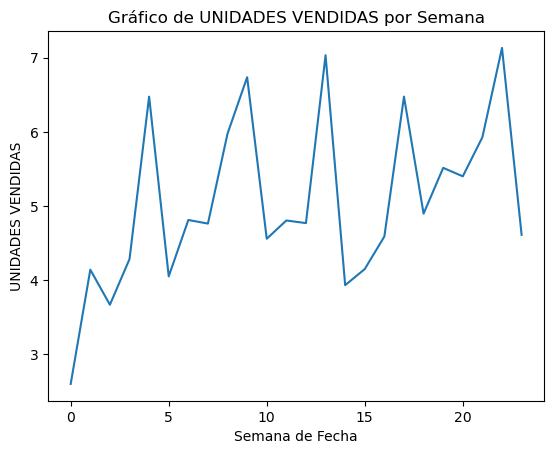

In [14]:
Datos_de_venta_por_semana = Ventas_semanales.groupby('Semana de Fecha')[['CONTRIBUCION','ORDENES DE PEDIDO','UNIDADES VENDIDAS']].sum().reset_index()
Datos_de_venta_por_semana

def graficar(df,medida):
    plt.plot(df[medida])
    plt.xlabel('Semana de Fecha')
    plt.ylabel(medida)  # Añadí la etiqueta del eje y para mayor claridad
    plt.title(f'Gráfico de {medida} por Semana')
    plt.show()
graficar(Datos_de_venta_por_semana,'UNIDADES VENDIDAS')

Procesamiento de archivos

In [15]:
Ventas_Procesadas = Ventas_semanales.merge(Ventas_cerrado,how='left',on=['FECHA ASIGNADO','CODIGO'])
print(Ventas_Procesadas.shape,Ventas_Procesadas.columns)
Ventas_Procesadas = Ventas_Procesadas.merge(Clasificacion,how='left',on=['FECHA ASIGNADO','CODIGO'])
print(Ventas_Procesadas.shape,Ventas_Procesadas.columns)

Ventas_Procesadas.set_index('CODIGO',inplace=True)
Ventas_Procesadas.drop(columns='FECHA',inplace=True)
Ventas_Procesadas.head()

(16663, 13) Index(['CODIGO', 'FECHA', 'FECHA ASIGNADO', 'Semana de Fecha', 'CONTRIBUCION',
       'ORDENES DE PEDIDO', 'UNIDADES VENDIDAS', 'CONTRIBUCION-2',
       'ORDENES DE PEDIDO-2', 'UNIDADES VENDIDAS-2', 'CONTRIBUCION-3',
       'ORDENES DE PEDIDO-3', 'UNIDADES VENDIDAS-3'],
      dtype='object')
(16705, 16) Index(['CODIGO', 'FECHA', 'FECHA ASIGNADO', 'Semana de Fecha', 'CONTRIBUCION',
       'ORDENES DE PEDIDO', 'UNIDADES VENDIDAS', 'CONTRIBUCION-2',
       'ORDENES DE PEDIDO-2', 'UNIDADES VENDIDAS-2', 'CONTRIBUCION-3',
       'ORDENES DE PEDIDO-3', 'UNIDADES VENDIDAS-3', 'CATEGORIA', 'LINEA',
       'CALIFICACION'],
      dtype='object')


,FECHA ASIGNADO,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS,CONTRIBUCION-2,ORDENES DE PEDIDO-2,UNIDADES VENDIDAS-2,CONTRIBUCION-3,ORDENES DE PEDIDO-3,UNIDADES VENDIDAS-3,CATEGORIA,LINEA,CALIFICACION
CODIGO,,,,,,,,,,,,,,
X548,2023-07,Semana 23,0.145135,0.120148,0.057143,0.43674,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
X548,2023-07,Semana 24,0.277133,0.177449,0.224176,0.43674,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
X548,2023-07,Semana 25,0.158138,0.160813,0.072527,0.43674,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
X548,2023-07,Semana 26,0.246683,0.223660,0.182418,0.43674,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
X548,2023-07,Semana 27,0.246299,0.136784,0.195604,0.43674,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA


In [16]:
"""Codigo y fecha- Para buscar unidadesvendiads viejas, contribucion de las viejas"""

'Codigo y fecha- Para buscar unidadesvendiads viejas, contribucion de las viejas'

In [17]:
Ventas_Procesadas.columns

Index(['FECHA ASIGNADO', 'Semana de Fecha', 'CONTRIBUCION',
       'ORDENES DE PEDIDO', 'UNIDADES VENDIDAS', 'CONTRIBUCION-2',
       'ORDENES DE PEDIDO-2', 'UNIDADES VENDIDAS-2', 'CONTRIBUCION-3',
       'ORDENES DE PEDIDO-3', 'UNIDADES VENDIDAS-3', 'CATEGORIA', 'LINEA',
       'CALIFICACION'],
      dtype='object')

Transformacion de semanas

In [18]:
Ventas_Procesadas['Semana de Fecha'] = Ventas_Procesadas['Semana de Fecha'].apply(lambda x: int(x[-2:]))
Ventas_Procesadas = Ventas_Procesadas.sort_values(by='Semana de Fecha',ascending=True)
Ventas_Procesadas.head()

Diccionario_semanas_transformacion = {}

for mes in Ventas_Procesadas['FECHA ASIGNADO'].unique():
    Auxiliar = Ventas_Procesadas[Ventas_Procesadas['FECHA ASIGNADO']==mes]
    Semanas = Auxiliar['Semana de Fecha'].unique()
    Semana_nueva = np.arange(0,Semanas.shape[0],1)
    for indice in Semana_nueva:
        Diccionario_semanas_transformacion[Semanas[indice]]=Semana_nueva[indice]+1
Ventas_Procesadas['Semana de Fecha'] = Ventas_Procesadas['Semana de Fecha'].apply(lambda x: Diccionario_semanas_transformacion[x])
Ventas_Procesadas.head(3)

,FECHA ASIGNADO,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS,CONTRIBUCION-2,ORDENES DE PEDIDO-2,UNIDADES VENDIDAS-2,CONTRIBUCION-3,ORDENES DE PEDIDO-3,UNIDADES VENDIDAS-3,CATEGORIA,LINEA,CALIFICACION
CODIGO,,,,,,,,,,,,,,
X548,2023-07,1,0.145135,0.120148,0.057143,0.436740,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
X386,2023-07,1,0.109041,0.000000,0.006593,0.136402,0.018484,0.019780,0.117994,0.003697,0.006593,C2,S2,IMAGEN
X420,2023-07,1,0.111932,0.000000,0.006593,0.142416,0.007394,0.008791,0.152477,0.012939,0.013187,C2,S8,INTERROGANTE


Eliminación de meses con datos faltantes

In [19]:
Ventas_Procesadas = Ventas_Procesadas.dropna()
Ventas_Procesadas.head(3)

,FECHA ASIGNADO,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS,CONTRIBUCION-2,ORDENES DE PEDIDO-2,UNIDADES VENDIDAS-2,CONTRIBUCION-3,ORDENES DE PEDIDO-3,UNIDADES VENDIDAS-3,CATEGORIA,LINEA,CALIFICACION
CODIGO,,,,,,,,,,,,,,
X548,2023-07,1,0.145135,0.120148,0.057143,0.436740,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
X386,2023-07,1,0.109041,0.000000,0.006593,0.136402,0.018484,0.019780,0.117994,0.003697,0.006593,C2,S2,IMAGEN
X420,2023-07,1,0.111932,0.000000,0.006593,0.142416,0.007394,0.008791,0.152477,0.012939,0.013187,C2,S8,INTERROGANTE


Codificación One-hot

In [20]:
Ventas_Procesadas = pd.get_dummies(Ventas_Procesadas,columns=['FECHA ASIGNADO','CATEGORIA','LINEA'],drop_first=True,dtype=float)
Ventas_Procesadas = pd.get_dummies(Ventas_Procesadas,columns=['CALIFICACION'],dtype=float)

Ventas_Procesadas.head(2)

,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS,CONTRIBUCION-2,ORDENES DE PEDIDO-2,UNIDADES VENDIDAS-2,CONTRIBUCION-3,ORDENES DE PEDIDO-3,UNIDADES VENDIDAS-3,...,LINEA_S4,LINEA_S5,LINEA_S6,LINEA_S7,LINEA_S8,LINEA_S9,CALIFICACION_ESTRELLA,CALIFICACION_IMAGEN,CALIFICACION_INTERROGANTE,CALIFICACION_PROTECTOR
CODIGO,,,,,,,,,,,,,,,,,,,,,
X548,1,0.145135,0.120148,0.057143,0.436740,0.569316,0.397802,0.472167,0.713494,0.457143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
X386,1,0.109041,0.000000,0.006593,0.136402,0.018484,0.019780,0.117994,0.003697,0.006593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Separación en set de train y test

In [21]:
X =Ventas_Procesadas.iloc[:,:-4]
y = Ventas_Procesadas.iloc[:,-4:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS,CONTRIBUCION-2,ORDENES DE PEDIDO-2,UNIDADES VENDIDAS-2,CONTRIBUCION-3,ORDENES DE PEDIDO-3,UNIDADES VENDIDAS-3,...,LINEA_S16,LINEA_S17,LINEA_S2,LINEA_S3,LINEA_S4,LINEA_S5,LINEA_S6,LINEA_S7,LINEA_S8,LINEA_S9
CODIGO,,,,,,,,,,,,,,,,,,,,,
X95,1,0.103511,0.000000,0.004396,0.140197,0.072089,0.035165,0.123925,0.014787,0.028571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X510,2,0.109220,0.001848,0.006593,0.107454,0.009242,0.008791,0.109722,0.003697,0.004396,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
X361,1,0.103384,0.000000,0.004396,0.111352,0.003697,0.006593,0.128097,0.068392,0.048352,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X465,1,0.103511,0.000000,0.004396,0.103511,0.000000,0.004396,0.103511,0.000000,0.004396,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
X561,5,0.174720,0.048059,0.096703,0.546341,0.297597,0.265934,0.504664,0.292052,0.243956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
X_train.columns

Index(['Semana de Fecha', 'CONTRIBUCION', 'ORDENES DE PEDIDO',
       'UNIDADES VENDIDAS', 'CONTRIBUCION-2', 'ORDENES DE PEDIDO-2',
       'UNIDADES VENDIDAS-2', 'CONTRIBUCION-3', 'ORDENES DE PEDIDO-3',
       'UNIDADES VENDIDAS-3', 'FECHA ASIGNADO_2023-08',
       'FECHA ASIGNADO_2023-09', 'FECHA ASIGNADO_2023-10',
       'FECHA ASIGNADO_2023-11', 'CATEGORIA_C2', 'CATEGORIA_C3', 'LINEA_S10',
       'LINEA_S11', 'LINEA_S12', 'LINEA_S13', 'LINEA_S14', 'LINEA_S15',
       'LINEA_S16', 'LINEA_S17', 'LINEA_S2', 'LINEA_S3', 'LINEA_S4',
       'LINEA_S5', 'LINEA_S6', 'LINEA_S7', 'LINEA_S8', 'LINEA_S9'],
      dtype='object')

Rebalanceo de muestras

In [23]:
sm = SMOTE()  #Smote con parámetros por default
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train.to_numpy(), y_train.to_numpy())

# Imprime las formas para verificar
print("Forma de X_train antes de SMOTE:", X_train.shape)
print("Forma de X_train después de SMOTE:", X_train_resampled.shape)

Forma de X_train antes de SMOTE: (10939, 32)
Forma de X_train después de SMOTE: (28172, 32)


csv para pruebas

In [24]:
import pandas as pd
data_set_pruebas = pd.DataFrame({'CODIGO':['X712','X712','X564','X537','X289'],
'FECHA_ASIGNADO':['2023-10','2023-11','2023-08','2023-11','2023-09'],
'Semana_de_Fecha':[30,31,29,30,29],
'CONTRIBUCION':[0.103511,0.3033,0.107,0.1035,0.3033],
'ORDENES_DE_PEDIDO':[0.001848,0.4503,0.0055,0.000,0.0055],
'UNIDADES_VENDIDAS':[0.004396,0.9,0.0065,0.004,00.6]})
data_set_pruebas.set_index('CODIGO',inplace=True)
#data_set_pruebas.to_csv('Set_test.csv')


Modelos

In [25]:
model = MultiOutputClassifier(RandomForestClassifier(max_features=10,n_estimators=150))
model.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones
y_pred = model.predict(X_test.to_numpy())

# Calcular la precisión
accuracy_rf = accuracy_score(y_test.to_numpy(), y_pred)
print(f'Precisión: {accuracy_rf}')

Precisión: 0.9670932358318098


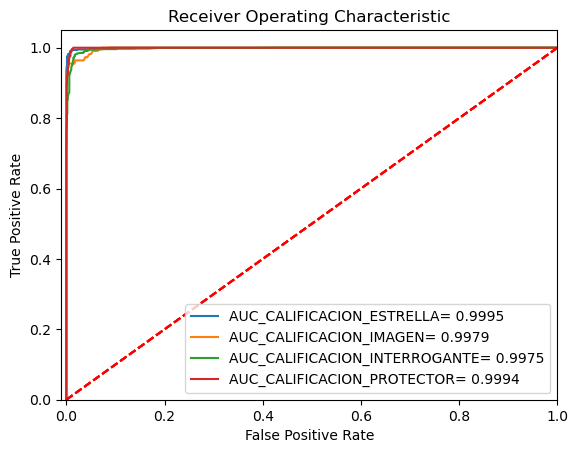

In [26]:

def Graficar_ROC(yreal,ypredicha,clase):
    fpr, tpr, thresholds = metrics.roc_curve(yreal, ypredicha, pos_label=1)
    AUCRegLog=metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label = 'AUC_' + clase +'= %0.4f' % AUCRegLog)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    

def organizar_predicciones(model,x_test):

    y_pred = model.predict_proba(x_test.to_numpy())
    
    diccionario_df={}
    inicio = 0
    
    for columna in y.columns:
        diccionario_df[columna+str('y_pred')] =y_pred[inicio][:,1]
        inicio +=1

    df_original = pd.DataFrame(diccionario_df,index = y_test.index)
    df_original = pd.concat([y_test,df_original],axis=1)

    for columna in np.arange(0,len(y.columns),1):
        y_test_auxiliar = df_original[[y.columns[columna],list(diccionario_df.keys())[columna]]]
        Graficar_ROC(y_test_auxiliar.iloc[:,0],
                     y_test_auxiliar.iloc[:,1],
                     y.columns[columna])
    
    plt.show()

    for columna in diccionario_df.keys():
        df_original[columna] = df_original[columna].apply(lambda x: 1 if x > 0.5 else 0) 
    
    df_original = df_original.iloc[:,4:]
    return df_original

resultados = organizar_predicciones(model,X_test)

Precisión: 0.8624862486248625


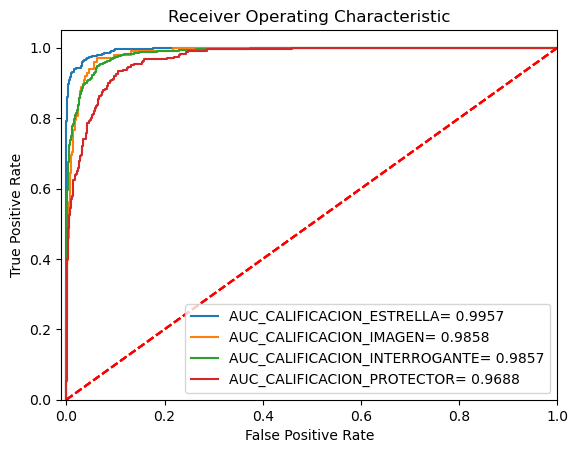

,CALIFICACION_ESTRELLAy_pred,CALIFICACION_IMAGENy_pred,CALIFICACION_INTERROGANTEy_pred,CALIFICACION_PROTECTORy_pred
CODIGO,,,,
X712,0,0,1,0
X542,0,0,1,0
X564,0,0,1,0
X537,0,0,1,0
X289,0,0,1,0
...,...,...,...,...
X645,0,0,1,0
X44,0,0,1,0
X753,0,0,1,0


In [ ]:
Boosting_Model = MultiOutputClassifier(GradientBoostingClassifier())

# Entrena el Boosting_Modelo
Boosting_Model.fit(X_train_resampled, y_train_resampled)

y_pred = Boosting_Model.predict(X_test.to_numpy())

# Calcular la precisión
accuracy_Boosting = accuracy_score(y_test.to_numpy(), y_pred)
print(f'Precisión: {accuracy_Boosting}')
organizar_predicciones(Boosting_Model,X_test)

In [ ]:
accuracy_rf,accuracy_Boosting

(0.9640630729739641, 0.8624862486248625)

Text(0.5, 1.0, 'COMPARACIÓN DE ACCURACY')

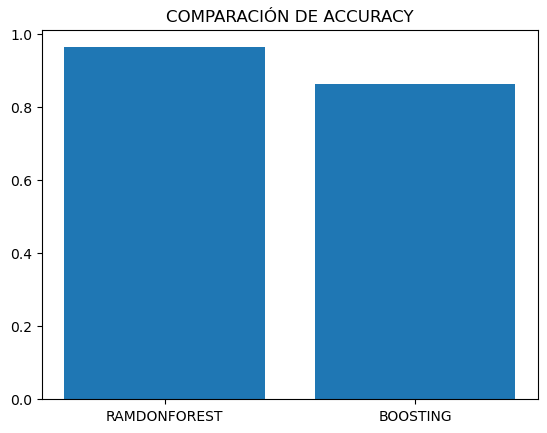

In [ ]:
plt.bar(x=['RAMDONFOREST','BOOSTING'],height=[accuracy_rf,accuracy_Boosting])
plt.title('COMPARACIÓN DE ACCURACY')

#### Datos para fuente de tablero:

In [28]:
resultados['TOTAL'] = resultados['CALIFICACION_IMAGENy_pred'] + resultados['CALIFICACION_INTERROGANTEy_pred'] + resultados['CALIFICACION_PROTECTORy_pred'] + resultados['CALIFICACION_ESTRELLAy_pred']

# Asegurar que solo haya un '1' en cada fila
for col in ['CALIFICACION_IMAGENy_pred', 'CALIFICACION_INTERROGANTEy_pred', 'CALIFICACION_PROTECTORy_pred', 'CALIFICACION_ESTRELLAy_pred']:
    resultados[col] = resultados.apply(lambda x: 1 if x['TOTAL'] == 1 and x[col] == 1 else 0, axis=1)

# Puedes eliminar la columna TOTAL si ya no la necesitas
resultados.drop(columns='TOTAL', inplace=True)
resultados['TOTAL'] = resultados['CALIFICACION_IMAGENy_pred'] + resultados['CALIFICACION_INTERROGANTEy_pred'] + resultados['CALIFICACION_PROTECTORy_pred'] + resultados['CALIFICACION_ESTRELLAy_pred']
resultados['CALIFICACION_INTERROGANTEy_pred'] = resultados.apply(lambda x: 1 if x['TOTAL'] == 0 else x['CALIFICACION_INTERROGANTEy_pred'], axis=1)
resultados.drop(columns='TOTAL', inplace=True)

In [29]:
resultado_from_dummies = pd.from_dummies(resultados)
resultado_from_dummies = resultado_from_dummies.rename(columns={'':'CUADRANTE_NUEVO'})
resultado_from_dummies['CUADRANTE_NUEVO'] = resultado_from_dummies['CUADRANTE_NUEVO'].str.replace('CALIFICACION_', '').str.replace('y_pred', '')

In [30]:
X_test_fechas = X_test.loc[:,'FECHA ASIGNADO_2023-08':'FECHA ASIGNADO_2023-11']
X_test_fechas['FECHA ASIGNADO_2023-07'] = (X_test_fechas == 0).all(axis=1).astype(int)
X_test_fechas = pd.from_dummies(X_test_fechas).rename(columns={'':'FECHA_ASIGNADO'})
X_test_fechas['FECHA_ASIGNADO'] = X_test_fechas['FECHA_ASIGNADO'].str.replace('FECHA ASIGNADO_', '')
X_test_fechas['FECHA_ASIGNADO']= pd.to_datetime(X_test_fechas['FECHA_ASIGNADO']) 
X_test_fechas['FECHA_MES_ANTERIOR'] = X_test_fechas['FECHA_ASIGNADO'] - pd.DateOffset(months=1)
X_test_fechas['FECHA_ASIGNADO'] = X_test_fechas['FECHA_ASIGNADO'].dt.strftime('%Y-%m')
X_test_fechas['FECHA_MES_ANTERIOR'] = X_test_fechas['FECHA_MES_ANTERIOR'].dt.strftime('%Y-%m')


Fuente Tablero

In [44]:
import json

json.__version__

'2.0.9'

In [31]:
X_test_datos_venta  =X_test[['Semana de Fecha','CONTRIBUCION','ORDENES DE PEDIDO', 'UNIDADES VENDIDAS']]

union_data_frames = pd.concat([X_test_datos_venta,X_test_fechas,resultado_from_dummies],axis=1).reset_index()
union_data_frames = union_data_frames.merge(Clasificacion[['FECHA ASIGNADO','CODIGO','CALIFICACION']],how='left',left_on=['CODIGO','FECHA_ASIGNADO'],
                        right_on=['CODIGO','FECHA ASIGNADO'])
union_data_frames

,CODIGO,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS,FECHA_ASIGNADO,FECHA_MES_ANTERIOR,CUADRANTE_NUEVO,FECHA ASIGNADO,CALIFICACION
0,X166,4,0.103511,0.005545,0.004396,2023-08,2023-07,ESTRELLA,2023-08,ESTRELLA
1,X222,4,0.108467,0.005545,0.006593,2023-07,2023-06,INTERROGANTE,2023-07,INTERROGANTE
2,X616,5,0.107917,0.003697,0.006593,2023-08,2023-07,INTERROGANTE,2023-08,INTERROGANTE
3,X361,2,0.107632,0.001848,0.004396,2023-10,2023-09,PROTECTOR,2023-10,PROTECTOR
4,X893,1,0.103511,0.001848,0.004396,2023-08,2023-07,ESTRELLA,2023-08,ESTRELLA
...,...,...,...,...,...,...,...,...,...,...
2781,X63,4,0.113849,0.001848,0.008791,2023-09,2023-08,ESTRELLA,2023-09,ESTRELLA
2782,X198,1,0.103384,0.000000,0.004396,2023-09,2023-08,INTERROGANTE,2023-09,INTERROGANTE
2783,X337,1,0.103511,0.000000,0.004396,2023-09,2023-08,INTERROGANTE,2023-09,INTERROGANTE
2784,X686,5,0.104887,0.001848,0.010989,2023-11,2023-10,INTERROGANTE,2023-11,INTERROGANTE


(-1.0999995636903486,
 1.0999996792226463,
 -1.0999996078202077,
 1.099999784992889)

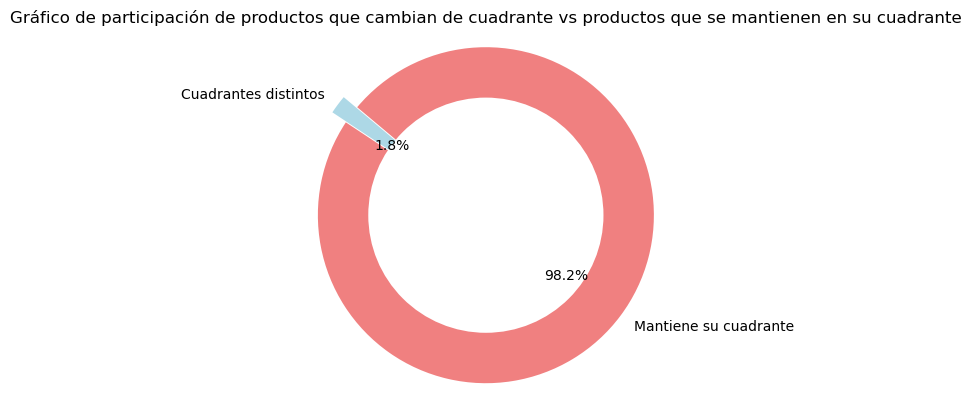

In [41]:
cambios =sum(union_data_frames['CUADRANTE_NUEVO']!=union_data_frames['CALIFICACION'])
total = sum(union_data_frames['CUADRANTE_NUEVO']==union_data_frames['CALIFICACION'])

import matplotlib.pyplot as plt

# Datos de ejemplo
labels = ['Cuadrantes distintos', 'Mantiene su cuadrante']
valores = [cambios, total]

# Colores para cada porción del pastel
colores = ['lightblue', 'lightcoral']

# Explode para separar las porciones
explode = (0.1, 0)

# Crear el gráfico de torta
plt.pie(valores, labels=labels, autopct='%1.1f%%', colors=colores, explode=explode, startangle=140)

# Añadir un círculo en el centro para que parezca un pastel
centro_circulo = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)
plt.title('Gráfico de participación de productos que cambian de cuadrante vs productos que se mantienen en su cuadrante')
# Ajustar el aspecto para que parezca un círculo
plt.axis('equal')

# Añadir título


In [ ]:
union_data_frames.columns

Index(['CODIGO', 'Semana de Fecha', 'CONTRIBUCION', 'ORDENES DE PEDIDO',
       'UNIDADES VENDIDAS', 'FECHA_ASIGNADO', 'FECHA_MES_ANTERIOR',
       'CUADRANTE_NUEVO', 'FECHA ASIGNADO', 'CALIFICACION'],
      dtype='object')

Dash

In [ ]:
union_data_frames.to_csv('Archivo_para_tabler.csv')

In [ ]:
df[df['country']=='Canada']

,country,continent,year,lifeExp,pop,gdpPercap
500,Canada,Americas,1950,68.280,14011422,10581.26552
501,Canada,Americas,1951,68.550,14330675,10932.46678
502,Canada,Americas,1952,68.750,14785584,11367.16112
503,Canada,Americas,1953,69.130,15183375,11586.61455
504,Canada,Americas,1954,69.990,15636245,11173.25950
505,Canada,Americas,1955,70.050,16050356,11901.50949
506,Canada,Americas,1956,70.040,16445087,12555.54947
507,Canada,Americas,1957,69.960,17010154,12489.95006
508,Canada,Americas,1958,70.620,17462004,12384.41018
509,Canada,Americas,1959,70.660,17872034,12590.80033
